In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from kmeans_jax.kmeans_in_practice import (
    plot_kmeans_in_practice_nmi_results,
    # plot_kmeans_in_practice_loss_results,
)
from kmeans_jax.theory_experiments import (
    plot_theorem_diff,
    plot_theorem_typical_partition,
    plot_theorem_warmup,
    plot_union_bound_corollary,
)

# Warmup

In [3]:
results_wmup = np.load(
    "../results/numerical_experiments_theory/results_warmup.npz", allow_pickle=True
)

In [4]:
results_wmup.files

['upper_bound',
 'empirical_probs',
 'd_values',
 'sigma2',
 'seed',
 'n_exps',
 'key']

In [ ]:
results_fixed = {
    "upper_bound": results_wmup["upper_bound"].copy(),
    "empirical_probs": results_wmup["empirical_probs"].copy(),
    "dimension_vals": results_wmup["d_values"].copy(),
    "noise_std_vals": np.sqrt(results_wmup["sigma2"].copy()),
    "seed": results_wmup["seed"],
    "n_experiments": results_wmup["n_exps"],
    "key": results_wmup["key"],
}

jnp.savez(
    "../results/numerical_experiments_theory/results_warmup_theorem.npz", **results_fixed
)

In [8]:
results_wmup = jnp.load(
    "../results/numerical_experiments_theory/results_warmup_theorem.npz",
    allow_pickle=True,
)

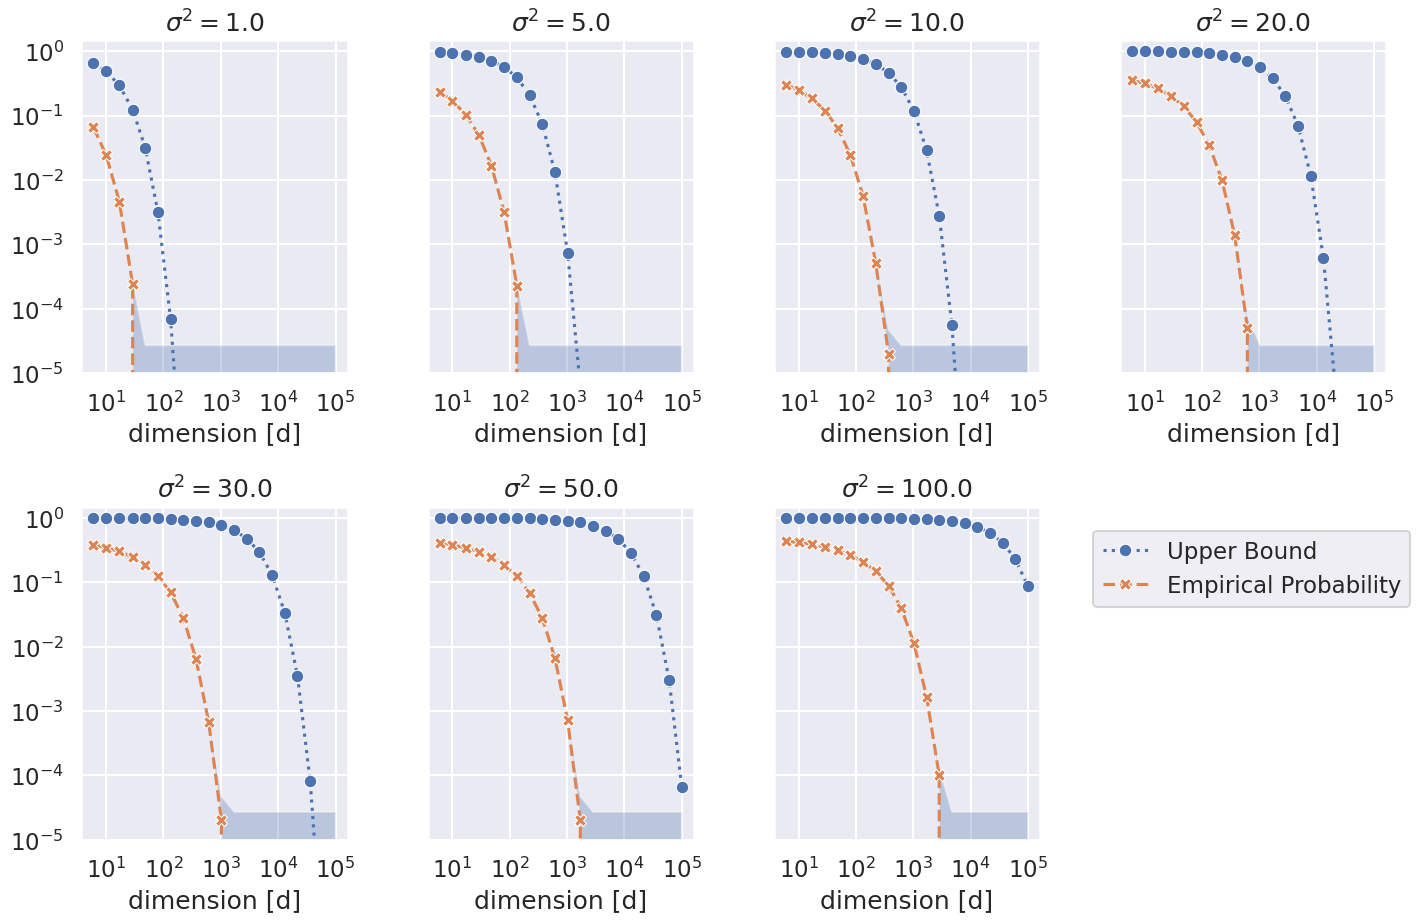

In [10]:
plot_theorem_warmup(results_wmup)

# Main

In [ ]:
results_main = np.load(
    "../results/numerical_experiments_theory/cont_results_main_theorem.npz",
    allow_pickle=True,
)

results_main.files

['upper_bound',
 'empirical_probs_worst',
 'empirical_probs_random',
 'd_values',
 'sigma2',
 's_C',
 's_T',
 'n_exps',
 'tau2',
 'seed',
 'i',
 'j',
 'key']

In [ ]:
results_fixed = {
    "upper_bound": results_main["upper_bound"].copy(),
    "empirical_probs_worst": results_main["empirical_probs_worst"].copy(),
    "empirical_probs_random": results_main["empirical_probs_random"].copy(),
    "dimension_vals": results_main["d_values"].copy(),
    "noise_std_vals": np.sqrt(results_main["sigma2"].copy()),
    "size_cluster_C": results_main["s_C"].copy(),
    "size_cluster_T": results_main["s_T"].copy(),
    "prior_std": results_main["tau2"].copy(),
    "seed": results_main["seed"],
    "n_experiments": results_main["n_exps"],
    "key": results_main["key"],
}

jnp.savez(
    "../results/numerical_experiments_theory/results_maindiff_theorem.npz",
    **results_fixed,
)

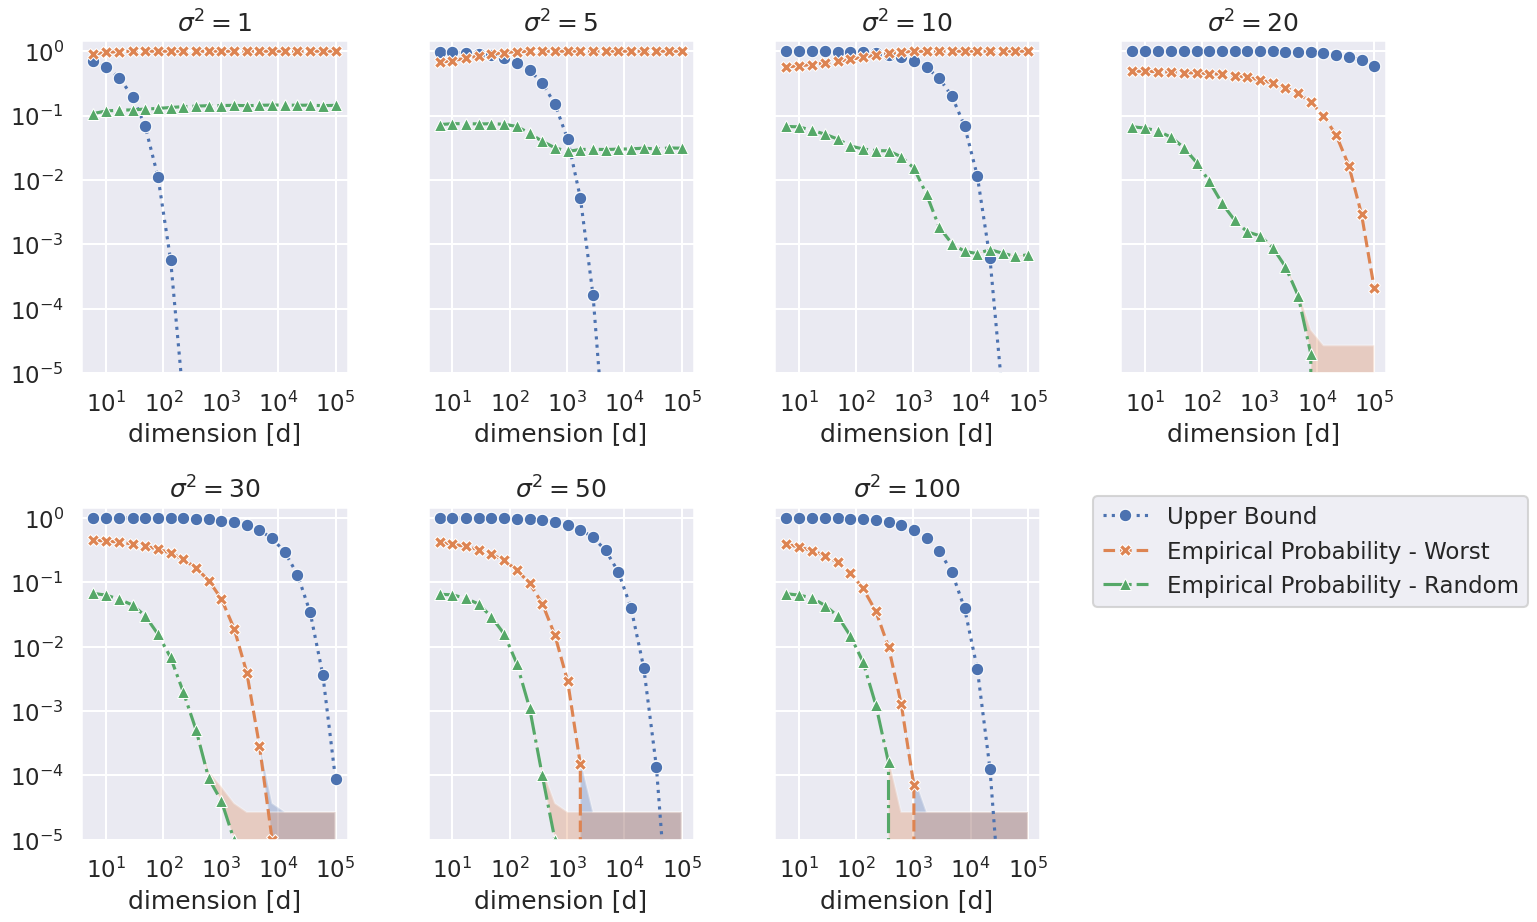

In [14]:
results_maindiff = jnp.load(
    "../results/numerical_experiments_theory/results_maindiff_theorem.npz",
    allow_pickle=True,
)
plot_theorem_diff(results_maindiff)

# Typical

In [ ]:
results_typical = np.load(
    "../results/numerical_experiments_theory/results_theorem26_ver2.npz",
    allow_pickle=True,
)

results_typical.files

['empirical_probs',
 'cluster_sizes',
 'dimension_vals',
 'noise_std_vals',
 'base_noise_std',
 'beta_values',
 'n_data_points',
 'n_experiments',
 'seed',
 'i',
 'key']

In [ ]:
from kmeans_jax.theory_experiments._typical_partition_theorem import compute_upper_bound


d_values = results_typical["dimension_vals"].copy()
sigma_vals = results_typical["noise_std_vals"].copy()

upper_bound_theorem = compute_upper_bound(d_values, sigma_vals**2)

In [ ]:
results_fixed = {
    "upper_bound": upper_bound_theorem,
    "empirical_probs": results_typical["empirical_probs"].copy(),
    "cluster_sizes": results_typical["cluster_sizes"].copy(),
    "dimension_vals": results_typical["dimension_vals"].copy(),
    "noise_std_vals": results_typical["noise_std_vals"].copy(),
    "beta_vals": results_typical["beta_values"].copy(),
    "base_noise_std": results_typical["base_noise_std"].copy(),
    "q_value": 2.8460497,
    "n_data_points": results_typical["n_data_points"].copy(),
    "n_experiments": results_typical["n_experiments"].copy(),
    "seed": results_typical["seed"].copy(),
    "key": results_typical["key"].copy(),
}

jnp.savez(
    "../results/numerical_experiments_theory/results_main_typical_part_theorem.npz",
    **results_fixed,
)

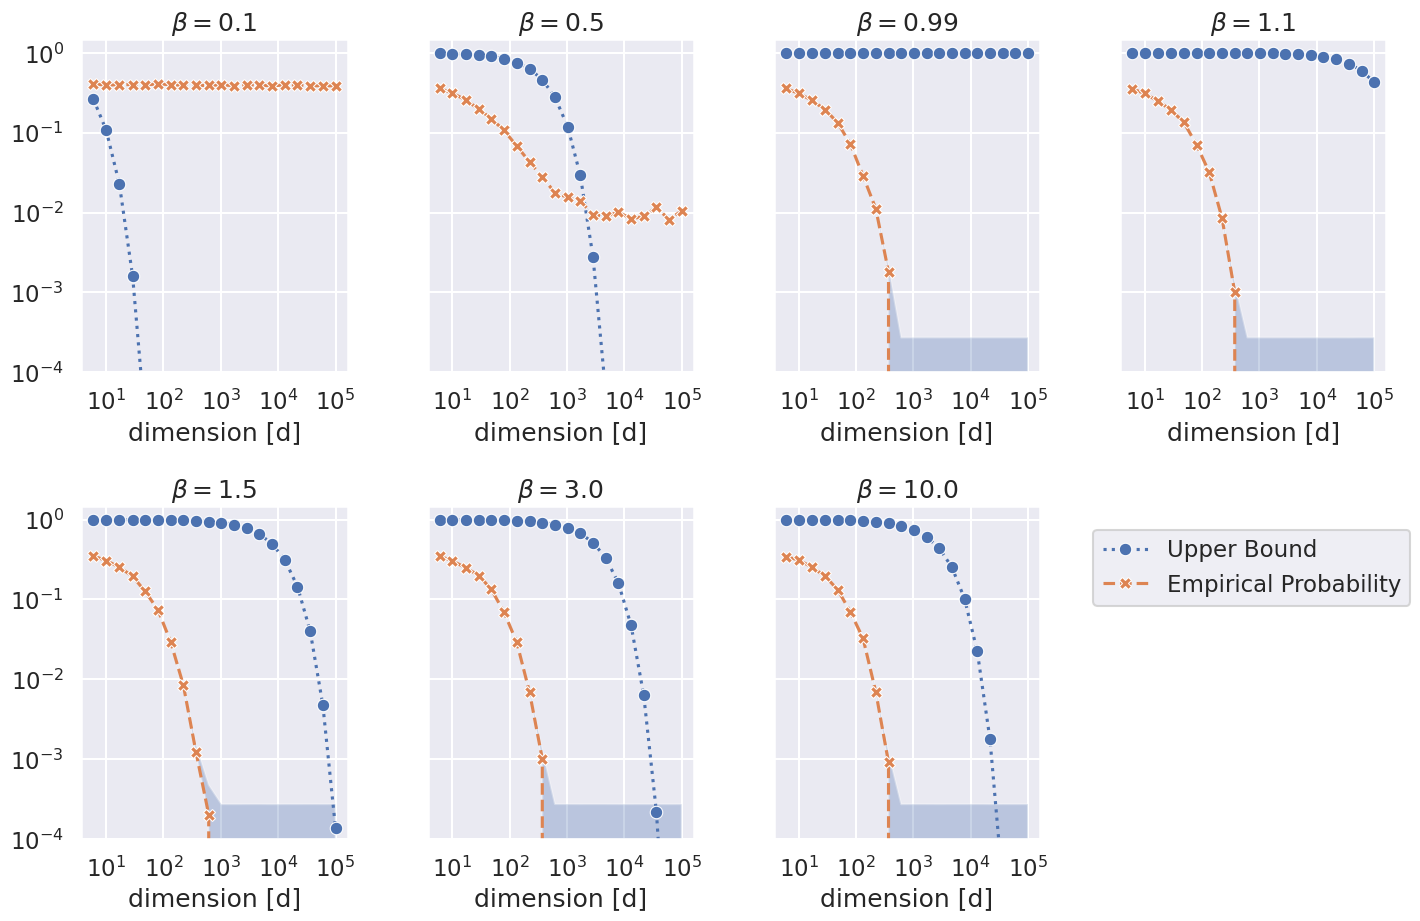

In [22]:
results_main_typical_part = jnp.load(
    "../results/numerical_experiments_theory/results_main_typical_part_theorem.npz",
    allow_pickle=True,
)
plot_theorem_typical_partition(results_main_typical_part)

# Union bound

In [ ]:
results_cor = np.load(
    "../results/numerical_experiments_theory/cont_results_union_bound_cor.npz",
    allow_pickle=True,
)

results_cor.files

['upper_bound',
 'empirical_probs',
 'd_values',
 'sigma2',
 's_C',
 's_T',
 'n_exps',
 'tau2',
 'seed',
 'i',
 'j',
 'key']

In [ ]:
results_fixed = {
    "upper_bound": results_cor["upper_bound"].copy(),
    "empirical_probs": results_cor["empirical_probs"].copy(),
    "dimension_vals": results_cor["d_values"].copy(),
    "noise_std_vals": np.sqrt(results_cor["sigma2"].copy()),
    "cluster_size": results_cor["s_C"].copy(),
    "prior_std": results_cor["tau2"].copy(),
    "seed": results_cor["seed"],
    "n_experiments": results_cor["n_exps"],
    "key": results_cor["key"],
}

jnp.savez(
    "../results/numerical_experiments_theory/results_union_bound_corollary.npz",
    **results_fixed,
)

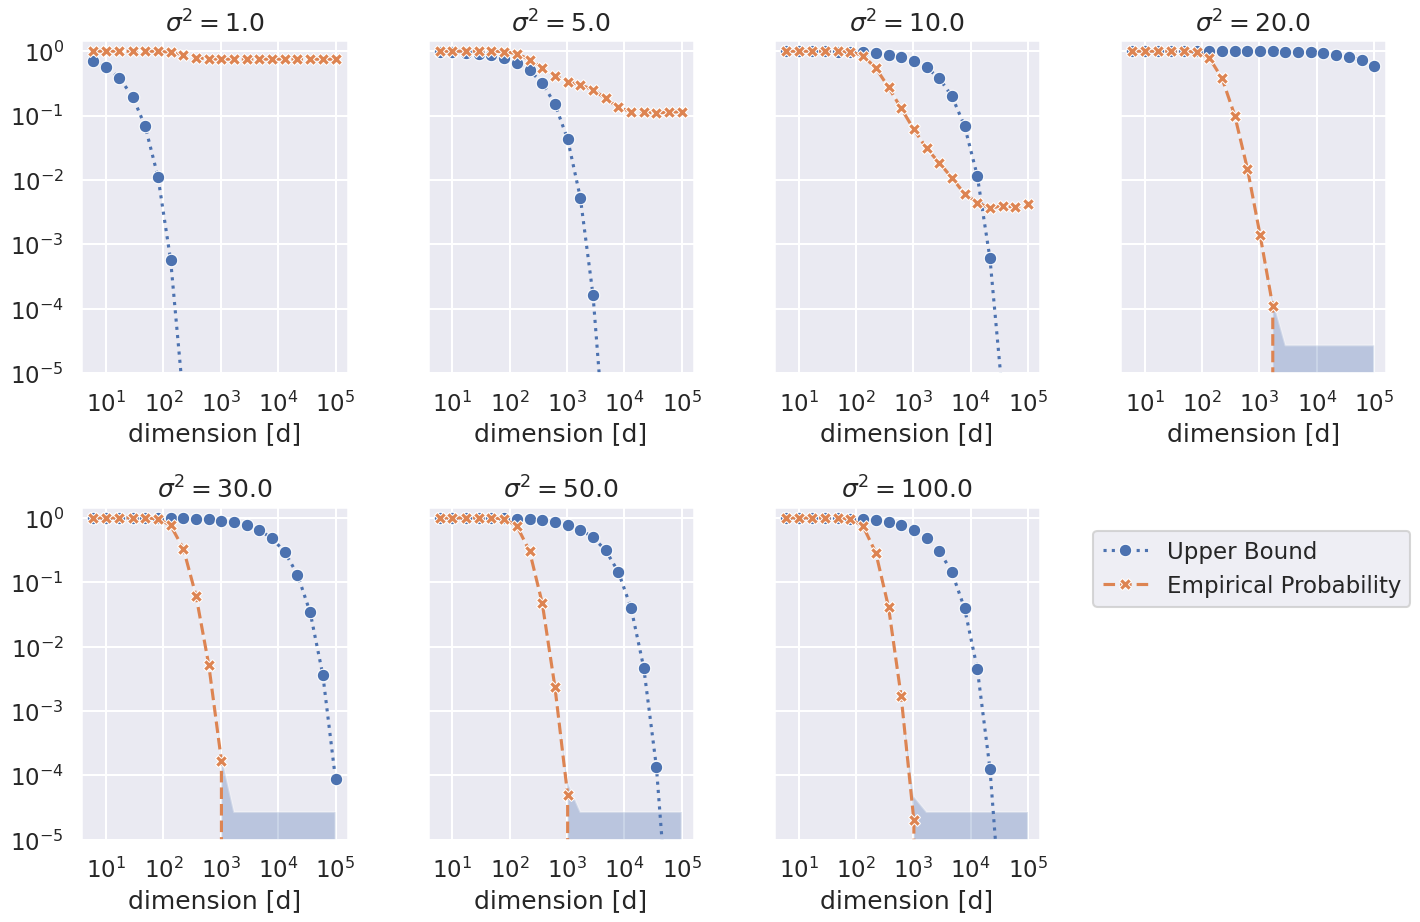

In [30]:
results_union_bound = jnp.load(
    "../results/numerical_experiments_theory/results_union_bound_corollary.npz",
    allow_pickle=True,
)
plot_union_bound_corollary(results_union_bound)

# k-means in practice

In [116]:
results_random_centers = jnp.load(
    "../results/kmeans_in_practice/experiments_init_random_centers.npz",
    allow_pickle=True,
)

results_random_centers.files

['i',
 'j',
 'nmi_kmeans',
 'nmi_kmeans_pca',
 'nmi_split_pca',
 'loss_kmeans',
 'loss_kmeans_pca',
 'loss_split_pca',
 'loss_true_partition']

In [117]:
prior_variance = 1.0
size_cluster1 = 20
size_cluster2 = 20
n_points = size_cluster1 + size_cluster2
n_experiments = 100
num_pca_components = 4
min_sigma2 = (
    2
    * prior_variance
    * (size_cluster1 - 1) ** 2
    / (size_cluster1**2 / size_cluster2 + size_cluster1)
)

dimension_vals = jnp.logspace(0.8, 7, 15, dtype=int)[:12]
noise_variance_vals = np.linspace(2.0, 6.0, 10) ** 2

In [118]:
results_fixed = {
    "nmi_kmeans": results_random_centers["nmi_kmeans"].copy(),
    "nmi_kmeans_pca": results_random_centers["nmi_kmeans_pca"].copy(),
    "nmi_split_pca": results_random_centers["nmi_split_pca"].copy(),
    "loss_kmeans": results_random_centers["loss_kmeans"].copy(),
    "loss_kmeans_pca": results_random_centers["loss_kmeans_pca"].copy(),
    "loss_split_pca": results_random_centers["loss_split_pca"].copy(),
    "loss_true_partition": results_random_centers["loss_true_partition"].copy(),
    "dimension_vals": dimension_vals,
    "noise_variance_vals": noise_variance_vals,
    "prior_variance": prior_variance,
    "size_cluster1": size_cluster1,
    "size_cluster2": size_cluster2,
    "n_experiments": n_experiments,
    "num_pca_components": num_pca_components,
    "init_method": "random_centers",
    "max_iters": 100,
}

jnp.savez(
    "../results/kmeans_in_practice/results_random_centers.npz",
    **results_fixed,
)
# results_random_centers = jnp.load(
#     "../results/kmeans_in_practice/results_random_partition.npz",
#     allow_pickle=True,
# )

In [154]:
results_random_partition = jnp.load(
    "../results/kmeans_in_practice/experiments_init_random_partition.npz",
    #"../results/kmeans_in_practice/expeirments_init_random_part40.npz",
    allow_pickle=True,
)

results_random_partition.files

['i',
 'j',
 'nmi_kmeans',
 'nmi_kmeans_pca',
 'nmi_split_pca',
 'loss_kmeans',
 'loss_kmeans_pca',
 'loss_split_pca',
 'loss_true_partition']

In [155]:
results_fixed = {
    "nmi_kmeans": results_random_partition["nmi_kmeans"].copy(),
    "nmi_kmeans_pca": results_random_partition["nmi_kmeans_pca"].copy(),
    "nmi_split_pca": results_random_partition["nmi_split_pca"].copy(),
    "loss_kmeans": results_random_partition["loss_kmeans"].copy(),
    "loss_kmeans_pca": results_random_partition["loss_kmeans_pca"].copy(),
    "loss_split_pca": results_random_partition["loss_split_pca"].copy(),
    "loss_true_partition": results_random_partition["loss_true_partition"].copy(),
    "dimension_vals": dimension_vals,
    "noise_variance_vals": noise_variance_vals,
    "prior_variance": prior_variance,
    "size_cluster1": size_cluster1,
    "size_cluster2": size_cluster2,
    "n_experiments": n_experiments,
    "num_pca_components": num_pca_components,
    "init_method": "random_centers",
    "max_iters": 100,
}

jnp.savez(
    "../results/kmeans_in_practice/results_random_partition.npz",
    **results_fixed,
)

In [156]:
results_random_centers = jnp.load(
    "../results/kmeans_in_practice/results_random_centers.npz",
    allow_pickle=True,
)

results_random_partition = jnp.load(
    "../results/kmeans_in_practice/results_random_partition.npz",
    allow_pickle=True,
)

results_kmeanspp = jnp.load(
    "../results/kmeans_in_practice/results_kmeanspp.npz",
    allow_pickle=True,
)

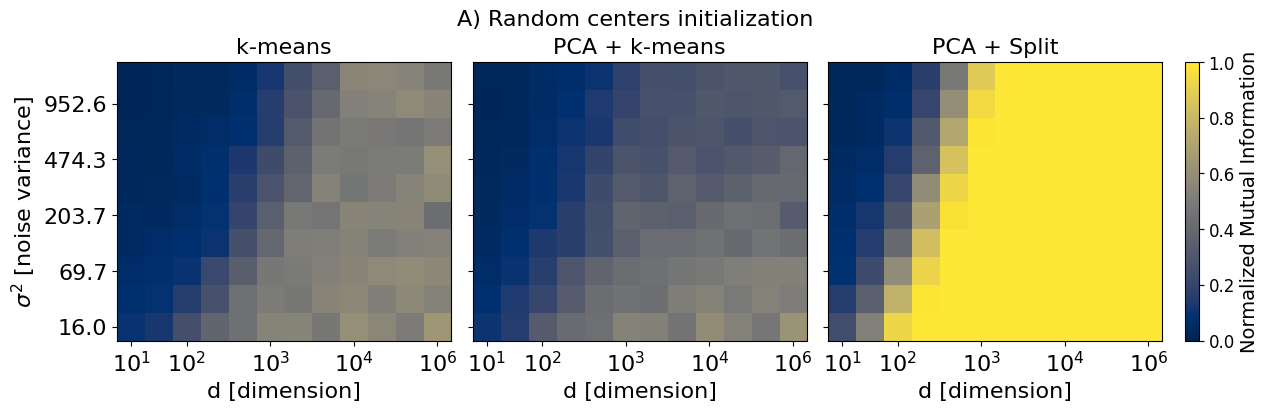

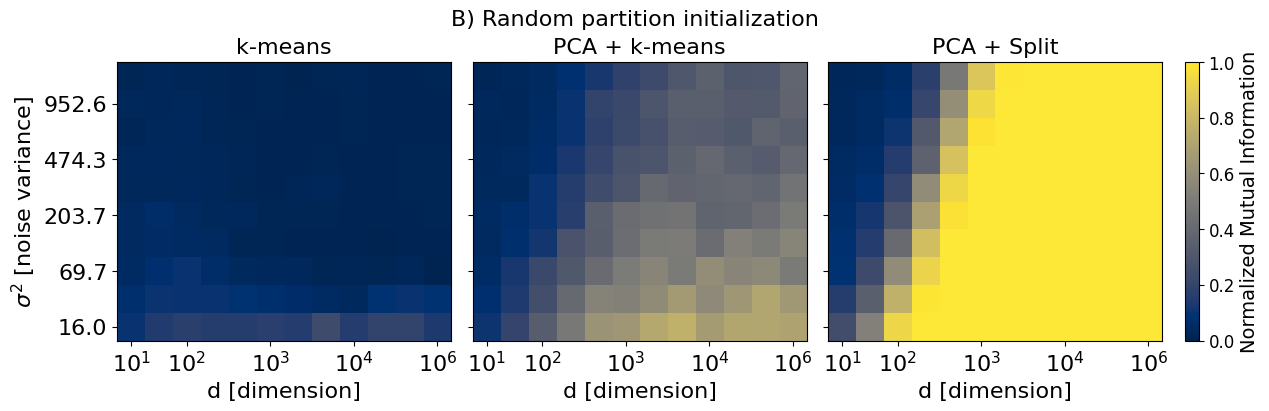

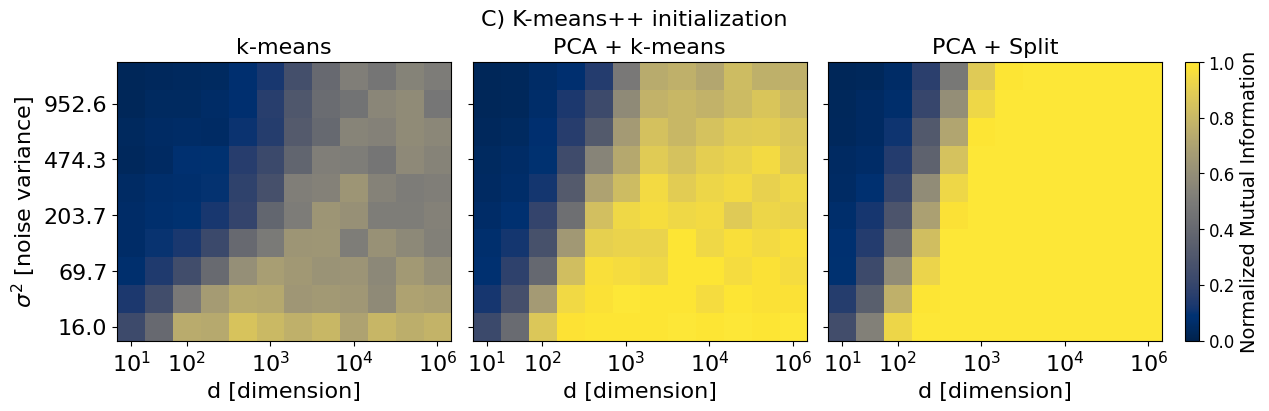

In [157]:
fig, ax = plot_kmeans_in_practice_nmi_results(
    results_random_centers, fig_suptitle="A) Random centers initialization"
)

fig, ax = plot_kmeans_in_practice_nmi_results(
    results_random_partition, fig_suptitle="B) Random partition initialization"
)
fig, ax = plot_kmeans_in_practice_nmi_results(
    results_kmeanspp, fig_suptitle="C) K-means++ initialization"
)

In [147]:
def plot_kmeans_in_practice_loss_results(results, fig_fname=None, fig_suptitle=None):
    # sns.set_theme(context="talk")

    def _compute_loss_metric(loss1, loss2):
        return jnp.where(
            jnp.isclose(loss1, loss2), 0, jnp.where(loss1 - loss2 > 0, 1, -1)
        ).mean(-1)

    def _plot_loss(loss_matrix, ax, method):
        im = ax.imshow(
            loss_matrix.T, origin="lower", vmin=-1, vmax=1, cmap="bwr_r"
        )
        ax.set_xticks(tick_indices, tick_labels, fontsize=fs)

        ax.set_yticks(
            np.arange(0, noise_variance_vals.shape[0], 2),
            labels=noise_variance_vals[::2].round(decimals=1),
            fontsize=fs,
        )
        ax.set_xlabel("d [dimension]", fontsize=fs)
        ax.set_title(method, fontsize=fs)

        return im

    fs = 16

    noise_variance_vals = results["noise_variance_vals"] ** 2
    dimension_vals = results["dimension_vals"]

    # x-axis ticks
    tick_indices = np.linspace(0, len(dimension_vals) - 1, num=5, dtype=int)
    tick_labels = [f"{d:.0f}" for d in np.log10(dimension_vals[tick_indices])]
    tick_labels = [rf"$10^{d}$" for d in tick_labels]

    fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True, layout="compressed")
    im = _plot_loss(
        _compute_loss_metric(results["loss_kmeans"], results["loss_true_partition"]),
        ax[0],
        "k-means",
    )
    im = _plot_loss(
        _compute_loss_metric(results["loss_kmeans_pca"], results["loss_true_partition"]),
        ax[1],
        "PCA + k-means",
    )
    im = _plot_loss(
        _compute_loss_metric(results["loss_split_pca"], results["loss_true_partition"]),
        ax[2],
        "PCA + Split",
    )

    ax[0].set_ylabel(r"$\sigma^2$ [noise variance]", fontsize=fs)
    cbar = plt.colorbar(im, label="Lower loss partition")
    cbar.ax.set_yticks([-1.0, 0.0, 1.0])  # Set ticks explicitly
    cbar.ax.set_yticklabels(["Ground Truth", "Equal", "Empirical"])  # Set matching labels

    if fig_suptitle is not None:
        fig.suptitle(fig_suptitle, fontsize=fs)

    if fig_fname is not None:
        plt.savefig(fig_fname, bbox_inches="tight", dpi=300)

    return fig, ax

(<Figure size 1500x400 with 4 Axes>,
 array([<Axes: title={'center': 'k-means'}, xlabel='d [dimension]', ylabel='$\\sigma^2$ [noise variance]'>,
        <Axes: title={'center': 'PCA + k-means'}, xlabel='d [dimension]'>,
        <Axes: title={'center': 'PCA + Split'}, xlabel='d [dimension]'>],
       dtype=object))

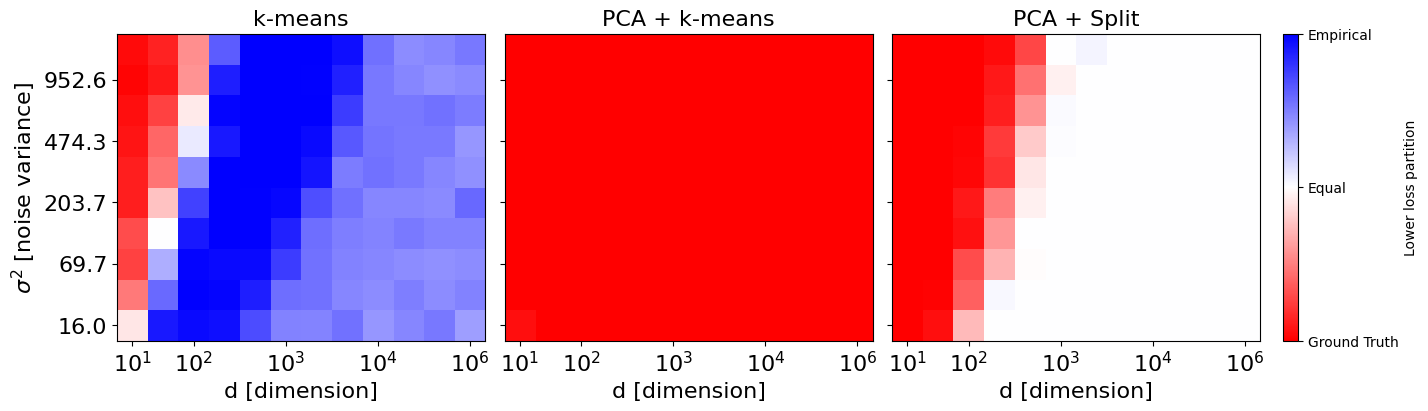

In [148]:
plot_kmeans_in_practice_loss_results(results_random_centers, fig_fname=None, fig_suptitle=None)

In [124]:
loss_kmeans.shape, true_loss.shape

((12, 10, 100), (12, 10, 100))